In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv("electricity_bill_data.csv")
print(df)


   Units  Bill
0     50   250
1    100   520
2    150   810
3    200  1120
4    250  1450
5    300  1800
6    350  2160
7    400  2550
8    450  2960
9    500  3400


In [5]:
X = df[['Units']].values   # Input feature
y = df[['Bill']].values   # Target output


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [8]:
# Name:NETHRAA N
# Register Number: 212224040217
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [9]:
model = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [15]:
# Name:NETHRAA N
# Register Number: 212224040217
def train_model(nethraa_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        output = nethraa_brain(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    return losses



In [17]:
losses = train_model(model, X_train, y_train, criterion, optimizer)



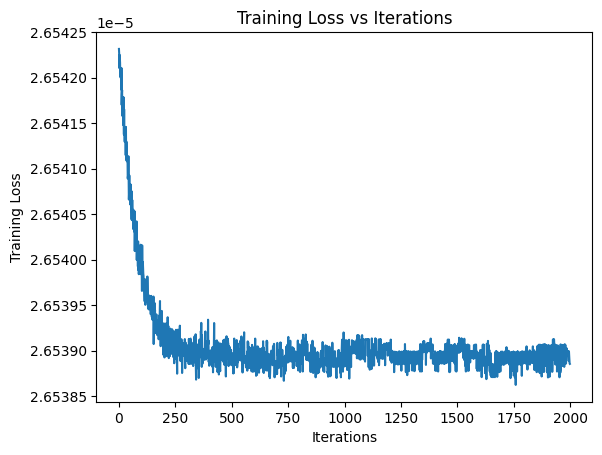

In [20]:
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Iterations")
plt.show()


In [21]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions, y_test)

print("Test Loss:", test_loss.item())


Test Loss: 7.614564674440771e-05


In [22]:
sample = np.array([[600]])  # Units consumed
sample_scaled = scaler_X.transform(sample)
sample_tensor = torch.tensor(sample_scaled, dtype=torch.float32)

with torch.no_grad():
    pred = model(sample_tensor)

predicted_bill = scaler_y.inverse_transform(pred.numpy())
print("Units:", sample[0][0])
print("Predicted Bill:", predicted_bill[0][0])


Units: 600
Predicted Bill: 4074.7786
